<a href="https://colab.research.google.com/github/abburinagamani/Libraries_for_ml/blob/main/sckitlearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
load_iris()

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)


In [ ]:
from sys import version
import sklearn
import pandas as pd
from sklearn.datasets import fetch_openml
df=fetch_openml('titanic',version=1, as_frame=True)['data']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   int64   
 5   parch      1309 non-null   int64   
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
dtypes: category(2), float64(3), int64(3), object(5)
memory usage: 115.4+ KB


In [ ]:
df.isnull().sum()

,0
pclass,0
name,0
sex,0
age,263
sibsp,0
parch,0
ticket,0
fare,1
cabin,1014
embarked,2


Text(0.5, 1.0, 'missing values in percentage')

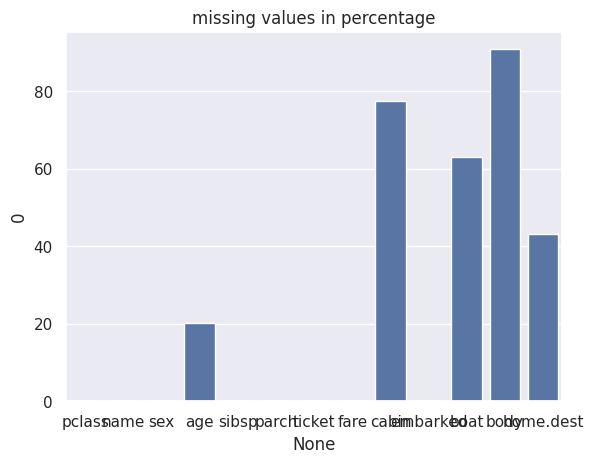

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
miss_per_value = pd.DataFrame((df.isnull().sum() / len(df)) * 100)
sns.barplot(x=miss_per_value.index, y=miss_per_value[0])
plt.title("missing values in percentage")


In [ ]:
print(f"size of the dataset {df.shape}")

size of the dataset (1309, 13)


In [ ]:
df.drop(['body'],axis=1,inplace=True)
print(f"size of the dataset {df.shape}")

size of the dataset (1309, 12)


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df['age'] = imputer.fit_transform(df[['age']]).ravel()
print(f"after imputation {df['age'].isnull().sum()}")


after imputation 0


In [ ]:
def get_parameters(df):
  parameters={}
  for col in df.columns[df.isnull().any()]:
    if df[col].dtype=='float64' or df[col].dtype=='int64' or df[col].dtype=='int32':
      strategy='mean'
    else:
      strategy='most_frequent'
    missing_values=df[col][df[col].isnull()].values[0]
    parameters[col]={'missing_values':missing_values,'strategy':strategy}
  return parameters
get_parameters(df)

{'fare': {'missing_values': np.float64(nan), 'strategy': 'mean'},
 'cabin': {'missing_values': nan, 'strategy': 'most_frequent'},
 'embarked': {'missing_values': nan, 'strategy': 'most_frequent'},
 'boat': {'missing_values': nan, 'strategy': 'most_frequent'},
 'home.dest': {'missing_values': nan, 'strategy': 'most_frequent'}}

In [ ]:
from sklearn.impute import SimpleImputer

parameters = get_parameters(df)
for col, param in parameters.items():
    missing_values = param['missing_values']
    strategy = param['strategy']

    imp = SimpleImputer(missing_values=missing_values, strategy=strategy)
    df[col] = imp.fit_transform(df[[col]]).ravel()


In [ ]:
df.isnull().sum()

,0
pclass,0
name,0
sex,0
age,0
sibsp,0
parch,0
ticket,0
fare,0
cabin,0
embarked,0


In [ ]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,13,"Montreal, PQ / Chesterville, ON"
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,13,"Montreal, PQ / Chesterville, ON"
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,13,"Montreal, PQ / Chesterville, ON"


<Axes: title={'center': 'passenger travelled alone'}, xlabel='travelled_alone'>

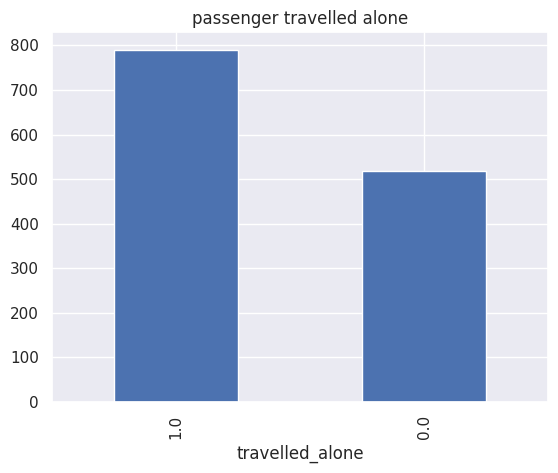

In [ ]:
df['family']=df['sibsp']+df['parch']
df.loc[df['family']>0,'travelled_alone']=0
df.loc[df['family']==0,'travelled_alone']=1
df['travelled_alone'].value_counts().plot(title='passenger travelled alone',kind='bar')

In [ ]:
from sklearn.preprocessing import StandardScaler
num_cols=df.select_dtypes(include=['int64','float64','int32']).columns
print(num_cols)


Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'family', 'travelled_alone'], dtype='object')


In [ ]:
ss=StandardScaler()

In [ ]:
df[num_cols]=ss.fit_transform(df[num_cols])
df[num_cols].describe()

,pclass,age,sibsp,parch,fare,family,travelled_alone
count,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03
mean,-1.737003e-16,1.519878e-16,-8.142201e-18,1.628440e-17,4.342507e-17,1.357033e-17,6.513761e-17
std,1.000382e+00,1.000382e+00,1.000382e+00,1.000382e+00,1.000382e+00,1.000382e+00,1.000382e+00
min,-1.546098e+00,-2.307330e+00,-4.790868e-01,-4.449995e-01,-6.437751e-01,-5.583461e-01,-1.233758e+00
25%,-3.520907e-01,-6.119712e-01,-4.790868e-01,-4.449995e-01,-4.911082e-01,-5.583461e-01,-1.233758e+00
50%,8.419164e-01,2.758687e-16,-4.790868e-01,-4.449995e-01,-3.643001e-01,-5.583461e-01,8.105319e-01
75%,8.419164e-01,3.974806e-01,4.812878e-01,-4.449995e-01,-3.906640e-02,7.335229e-02,8.105319e-01
max,8.419164e-01,3.891737e+00,7.203909e+00,9.956864e+00,9.262219e+00,5.758637e+00,8.105319e-01


In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
df[num_cols]=minmax.fit_transform(df[num_cols])
df[num_cols]


,pclass,age,sibsp,parch,fare,family,travelled_alone
0,0.0,0.361169,0.000,0.000000,0.412503,0.0,1.0
1,0.0,0.009395,0.125,0.222222,0.295806,0.3,0.0
2,0.0,0.022964,0.125,0.222222,0.295806,0.3,0.0
3,0.0,0.373695,0.125,0.222222,0.295806,0.3,0.0
4,0.0,0.311064,0.125,0.222222,0.295806,0.3,0.0
...,...,...,...,...,...,...,...
1304,1.0,0.179540,0.125,0.000000,0.028213,0.1,0.0
1305,1.0,0.372206,0.125,0.000000,0.028213,0.1,0.0
1306,1.0,0.329854,0.000,0.000000,0.014102,0.0,1.0
1307,1.0,0.336117,0.000,0.000000,0.014102,0.0,1.0
